In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
df = pd.read_csv(r"C:\Users\user\Downloads\2) Stock Prices Data Set.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [47]:
df.shape


(497472, 7)

In [48]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [49]:
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [50]:
df.isna().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df = df.drop_duplicates()

In [53]:
df.index[:10]


RangeIndex(start=0, stop=10, step=1)

In [54]:
df.columns



Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [55]:
['date', 'timestamp', 'Month', 'Time', 'sales']



['date', 'timestamp', 'Month', 'Time', 'sales']

In [56]:
df.index.to_series().diff().value_counts().head()


1.0    497471
Name: count, dtype: int64

In [57]:
df.index[:10]

RangeIndex(start=0, stop=10, step=1)

In [58]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [59]:
print(df.columns)


Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [60]:
df_daily_volume = df.groupby(df.index)['volume'].sum()


In [61]:
# Daily average close price (if multiple symbols per day)
df_daily = df.groupby(df.index)['close'].mean()


In [62]:
df_daily.head()
df_daily.index[:10]


RangeIndex(start=0, stop=10, step=1)

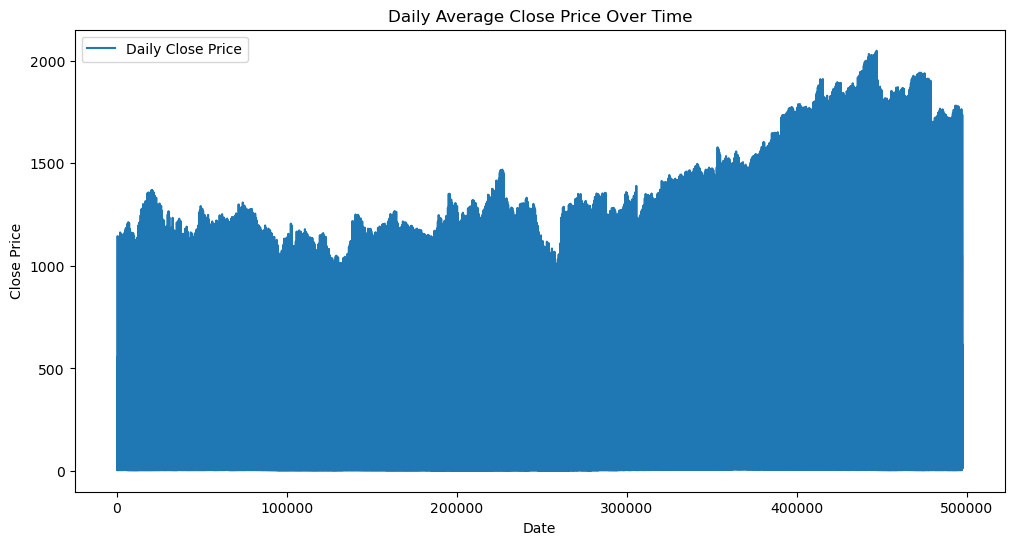

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_daily, label='Daily Close Price')
plt.title("Daily Average Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Decompose the series into trend, seasonality, and residuals

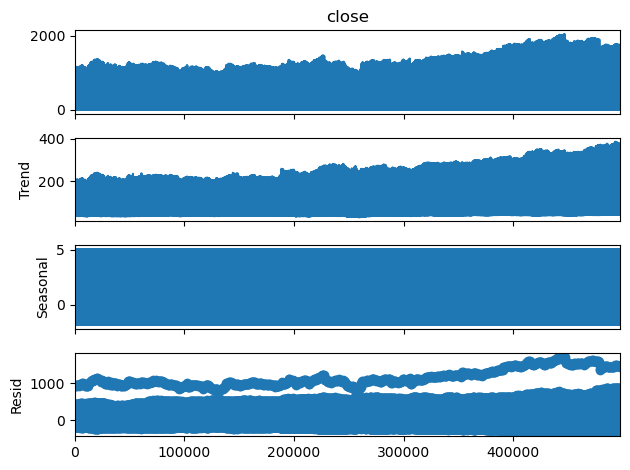

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_daily, model='additive', period=7)
decomposition.plot()
plt.show()


Perform moving average smoothing

This smooths short-term fluctuations to see trends more clearly.

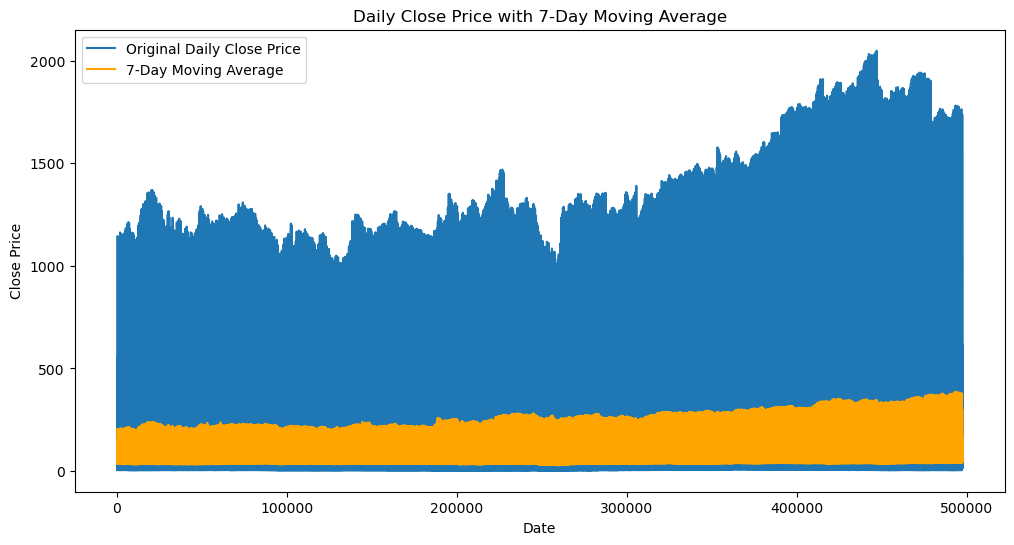

In [22]:
# 7-day moving average
df_daily_ma = df_daily.rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(df_daily, label='Original Daily Close Price')
plt.plot(df_daily_ma, label='7-Day Moving Average', color='orange')
plt.title("Daily Close Price with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


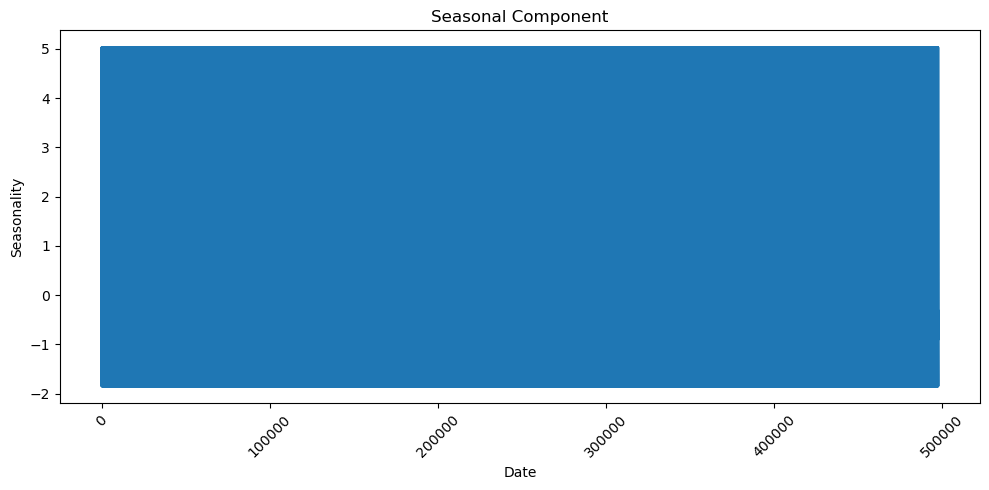

In [35]:
# Seasonal Component (Decomposition)

plt.figure(figsize=(10,5))
plt.plot(decomposition.seasonal)
plt.title("Seasonal Component")
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion
I analyzed stock price data using time-series techniques to uncover hidden trends and market patterns. By combining decomposition and smoothing methods, I converted raw financial data into clear, insight-driven conclusions.
This project showcases my ability to turn complex data into strategic insights using Python, a skill I bring confidently to data and financial analytics roles.